In [3]:
#2
print("Size: {}".format(data.size))
print("Dimension: {}".format(data.shape))

Size: 10692
Dimension: (891, 12)


In [4]:
# 3
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

([<matplotlib.patches.Wedge at 0x2862e3741f0>,
 [Text(0.39257483889210154, 1.0275626481479563, 'Survived'),
  Text(-0.3925747426847421, -1.0275626849034607, 'Not Survived')])

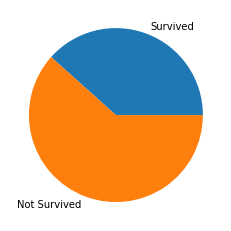

In [37]:
#4
fig, d = plt.subplots()
size = [data['Survived'].sum(), len(data) - data['Survived'].sum()]
label = ['Survived', 'Not Survived']
d.pie(sizes, labels=label)
# more people did not survive

ValueError: 'label' must be of length 'x'

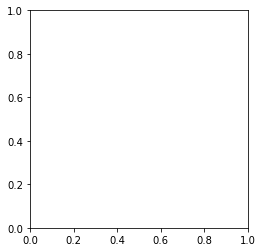

In [2]:
import matplotlib.pyplot as plt

x = data.Pclass
labels = ['1', '2', '3']
colors = ['tab:blue', 'tab:cyan', 'tab:gray']

fig, ax = plt.subplots()
ax.pie(x, labels = labels,
          colors = colors,
          autopct='%.0f%%',
          shadow = True,
          startangle = 180)

ax.set_title('Survery responses')
plt.show()

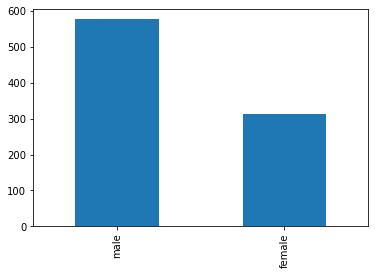

In [35]:
#5
data['Sex'].value_counts().plot(kind='bar')

In [18]:
#8
pd.crosstab(data['Pclass'], data['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


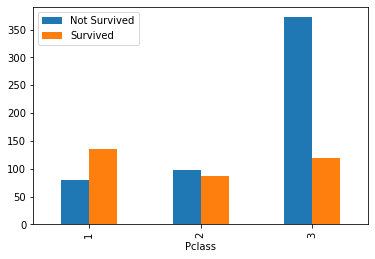

In [19]:
#9
d = data.groupby(['Pclass', 'Survived'])['Survived'].count().to_frame().unstack(1).plot(kind='bar')
d.legend(labels=['Not Survived', 'Survived'])


In [20]:
#10 
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [21]:
#11
print("Oldest passenger: {}".format(data['Age'].max()))

Oldest passenger: 80.0


In [22]:
#12
print("Youngest passenger: {}".format(data['Age'].min()))

Youngest passenger: 0.42


In [38]:
#13
print("Average of the passengers age: {}".format(data['Age'].mean()))

Average of the passengers age: 29.69911764705882


In [26]:
#16
print("Lowest fare: {}".format(data['Fare'].min()))

Lowest fare: 0.0


In [28]:
#17
print("Highest fare: {}".format(data['Fare'].max()))

Highest fare: 512.3292


In [29]:
#18 
print("Average fare: {}".format(data['Fare'].mean()))

Average fare: 32.2042079685746


In [4]:
print("Highest number of siblings: {}".format(data['SibSp'].max()))

Oldest passenger: 8


In [13]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
dataset = dataset.drop(['Name'], axis=1)
dataset.Title.value_counts()


1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

([<matplotlib.patches.Wedge at 0x1b1881d66a0>,
 [Text(0.8928746277553131, 0.6424756019576241, 'Survived'),
  Text(-0.8928746277553131, -0.6424756019576241, 'Not Survived')])

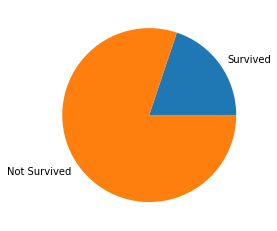

In [18]:
group_pclass =  data.groupby('Pclass')
class1 = group_pclass.get_group(1)
fig, d = plt.subplots()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARUAAADnCAYAAAAww8JEAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAWNklEQVR4nO3deZhcVZ3G8e8vGztXVgkItBIIhJ2wI4jOiEsgAWUJk0HBBVwQdBDtARkOqEMYZRgVEuFxVJZhF9kaCAKyB4YB2QKyt+wIApeEJZ3uPvPHuW2aprurqvtWnbp138/z1JNOd9Wtt5P0m3vuco557xERycuY2AFEpLWoVEQkVyoVEcmVSkVEcqVSEZFcqVREJFcqFRHJlUpFRHKlUhGRXKlURCRXKhURyZVKRURypVIRkVypVEQkVyoVEcmVSkVEcqVSEZFcqVREJFcqFRHJlUpFRHKlUhGRXKlURCRXKhURyZVKRURypVIRkVypVEQkVyoVEcnVuNgBpABc8gFgMrAhsBaw6iCPDxD+PVn26AWWAF3A28CrwF+Bl7Nf+z5+FngMl3Y16tuR+jIt0C5/55KVgR2BrYGNCEWyEbBGnd+5G3gCeBhY0O/xCC7tqfN7S85UKmXmkvWBXfo9Nqe5hsQLgduAm7LHPSqZ5qdSKROXLAf8I7AX8Glg3biBatZXMjcCl+PSxyPnkUGoVFqdS1YilMi+wKeA5eMGytWCV/zK5263+JdXds6etiB2GAlUKq3IJQb8A3AYsCewbNxA9XNn7ya3zOw6bjfgQeA84OzO2dNeiByr1FQqrcQlqwOHAIcCkyKnaYgvdH3/wVt6t9y836e6gUuBX3TOnnZbpFilplJpBS7ZGfgm8HlgmchpGqbbj3lx0uJz1gKzIZ5yH3AacF7n7GnvNC5ZualUiswlHwMcsHvcIHHM75lyy4FLfrBbFU99DZgLnNI5e9rrdY5VeiqVIip5mfQ5qKv9oVt7t9ishpe8AfwU+Fnn7GmL6pNKVCpF4pLdgBMoeZkAdPsxL0xafM7EYYY+w3kFOAmY2zl72rs5Rys9lUoRuGQd4FRgv9hRmsXtPZvePGvJsR8b5WaeB44Dfts5e5p+EHLSTFdPykAuGY9Lvgf8GRXKe8ztmb5aDptZB/g1cHNbe8cmOWxP0J5K83LJx4HTAf1jH6Dbj3l+0uJz1h7h0GcoXcBPgB9pSDQ62lNpNi5ZBZecS7gUXYUyiPm9U57IuVAAJgDHAg+1tXd8Mudtl4r2VJqJSz4J/IawWy5DOLDr2AXzezfdtM5vcybwbV3fUjuVSjNwyQTgP4AjCHORyBC6/ZjnJi0+90MNeruHgAM6Z097uEHv1xI0/InNJRsC84EjUaFUdEfvpk828O02A+5ua+/4cgPfs/C0pxKTSz4HnAWsGDtKUczsOvbhO3s3nRLhrc8HDuucPW1hhPcuFO2pxOKSY4BLUKFUbYkf+1ykQgE4kLDX8pFI718YKpVGc8kEXHI28GM03KnJHb2bPhE5wmTgzrb2jp0i52hqKpVGcskahFPFB8WOUkRzuqevGTsDYb7eG9vaO/aNHaRZqVQaxSWbAHcR5oKVGi3xY5+9y0+JNfQZaFngorb2ju/FDtKMVCqN4JItgJuBD8eOUlS39W72VOwMAxhwclt7x5y29g4NY/tRqdSbS7YiDHnqvcxFS5vTPeODsTMM4evAGSqWpVQq9eSSqYRCyePmt9Ja4sc+c7ffeOPYOYbxVUB7LBmVSr24ZDvgemCV2FGK7tbezZ+OnaEKXyNMXVl6KpV6cMm2wB8IS4HKKJ3evEOfgb7R1t7x89FuxMyONbMFZvaAmd1nZjvksM3pZtY+2u1k2xp21jxdUZs3l7QBdwJF+UFoal1+7F82WnzO+rFz1OjkztnTRvQDbGY7Af8J7O69X2xmqwMTvPcVlx0xs3He++6RvG+NGRd574e8aFN7KnkKC5lfjQolN7f0blGEoc9A3x/F/UITgVe994sBvPeveu9fMLPOrGAws23N7KbsY2dmZ5rZdcDZZnaXmf39Dm4zu8nMpprZwWZ2mpkl2bbGZF9f3syeNbPxZraBmV1rZveY2a1mtnH2nA+b2Xwzu9vMfljpG1Cp5MUl4wnrzWgOlBzN6Z4xMXaGEZrb1t7x8RG87jpgXTN7zMzmmFk1U2ZOBWZ47/8JuADYH8DMJgJre+/v6Xui9z4F7gf6trsXMM97v4Qw3cO3vPdTge8Cc7Ln/AyY673fDnipUhiVSn5+BYzkH5EMocuP67zXbzQ5do4RGg/8rq29Y6NaXuS9X0QoiUMJE3RfaGYHV3jZFd77vnlfLmLp1KP7AxcP8vwLgQOyj2dm77EisDNwsZndB5xB2GuCcMHm+dnH51T6HlQqeXDJvwFfiB2j1dzcu+VfYmcYpVWAq9raO1at5UXe+x7v/U3e++OBwwmLxHWz9Od14DK2b/V77fPA38xsC0JxXDDIW1wBfMbMViUU2I3Ztt/w3m/V79F/r7vqg68qldFyyWcJa/BIzk4v7tCnvw2BS9raO8ZW82Qzm2xmG/b71FbAX4BOQgFAKJnhXAB8D0i89w8O/GK2N/S/hGHNVVmJvQk8bWb7ZTnMzLbMXnI7YY8GYFal70GlMhouWY+wO6iLnnLW5cc9fZ+fVNPQoYl9nOr/41kROMvMHjazB4Ap2WtPAH5mZrcCPRW2cQmhBC4a5jkXAv+c/dpnFvBlM7sfWADMyD5/JPBNM7sbSCp9AzqlPFIuGQfcAug2+DqY1zP15sOWHDXadX2aSS+wR+fsaTfEDlJv2lMZOYcKpW7mdO+9duwMORsDnNvW3rF67CD1plIZibD86L/GjtGqFvtxT93vN9iw8jMLZy3CaduWplKplUtWAM5Gf3Z188ferZ+JnaGO9mlr7/hS7BD1pB+M2p0AFO2y8UKZ0z291dc9OrWtvaMVzmwNSqVSC5dsSTgSLnWy2I9/8oHWHPr0tzJwSuwQ9aJSqZZLxhCuMhwXO0oru6F36+diZ2iQA9vaOz4RO0Q9qFSq9zVg1Legy/BO757RqNUHm8Hpbe0d42OHyJtKpRoumQj8e+wYre5dP/7JBf7DG8TO0UAbA0fFDpE3lUp1fkQVVxLK6NzQu01Zhj79HdfW3rFe7BB5UqlUEtY6/mLsGGVQsqFPn+UJZxRbhkqlshOAqm4Gk5F7149/4mHfVqahT38HtbV3TIodIi8qleG4ZHOW3p0pdfSH3qllHPr0GQscFztEXlQqwzsR3YHcEHO6Z6wbO0Nks2qd0KlZqVSGEmbE3zt2jDJ4x49//BG/flmHPn1aZm9FpTK0Y2IHKIvreretOFN8SRzY1t7RzIumVUWlMpgw+dL02DHKYk73jJY6pToKY4Fvxw4xWiqVwX0dnfFpiHf8hMce9etp4fqlZrW1d6wcO8RoqFQGcskywFdixyiLeb3bvhg7Q5NZETgodojRUKm830yg5WfnahYa+gzq67EDjIZK5f0Ojx2gLN72Ex57zK+roc/7bdrW3rFr7BAjpVLpL5xG3jZ2jLK4tnd7nfUZWmH3VlQq71VxTRPJz9zu6W2xMzSxz7e1dxTyJlaVSp8wCdP+sWOUxdt+mUcf9x9qi52jiU0A9owdYiRUKkvtCrTashBN65re7Ssu9C0VVyJsSiqVpfaNHaBMTu+e0RY7QwF8qq29Y/nYIWqlUgFwiaH7fBrmLb/MI0/5tbUiQWXLA5+OHaJWKpVgW6CMEwRFcXXPDn+NnaFACjcEUqkEhfvfoMjm9EzXtSnV27Nok2OrVIJWWgi8qS3yyz7ytF9bV9FWb2Vgm9ghaqFSccl4tNB6w3T07PBy7AwFVKira1UqsB3hgJg0wNye6WWfjGkkVCoFo6FPgyzyyz7c6SeWfdrIkfhoW3tHYaY1VamoVBrmqp6dXomdoaBWBabEDlGtcpdKuDR/l9gxymKOhj6jsVvsANUqd6nARwiT4kidLfTLLXjGf1DXAo3c9rEDVKvspVKYXcqiu7Jnp1djZyi4TWIHqJZKRRpibs/0llmBL5LCzLKvUpG6W+iXW/CsX3Od2DkKLmlr75gYO0Q1VCpSd5f37KyhTz4KsbdS3lIJdyYX4i+pyLzHn9Gzl4Y++SjEv9fylkqYkGmF2CFa3UI09MlRIQ7WlrlU1oodoAwu79nlb7EztJBCnJIvc6msETtAq/Me/8vuvTaKnaOFFGI9qjKXypqxA7S6N1n+oedZoxBnLApCpdLkVCp1dlnPLq/HztBiVCpNTsOfOvIef0b3XhvGztFiVi3C3cplLhXtqdTRm6zw0AusrqFPvsYCq8QOUUmZS6WQq78VxaU9H30tdoYWtVrsAJWUuVQmxA7QqrzHn9m95+TYOVrUMrEDVFLmUinUDOVFkrLCgy+ymq4Dqo9xsQNUUuZSafq/nKK6tGfXN2JnaGFjYweoRD9YkrtDxl675cFj5+mYSh0sZDkPL8aOMawyl0pv7ACtyozE8LFjtKSEt5v+322Zhz9N/5cjMoie2AEqKXOpvBU7gMgIdMUOUEmZS0V3z0oRNf2xKpWKSHH0olJpak3/lyMywBu4VMdUmpj2VKRoCjHXr0pFpDgKsWysSkWkOLSn0uQ6YwcQqVFzX0qbKXOpPAe8HTuESA0ejR2gGuUtFZd64LHYMURq8EjsANUob6kEhWh+kYxKpQBUKlIUbwHPxg5RDZWKSDE8mg3Zm17ZS6UQu5MiwJ9jB6hW2UvlQXS3shTDvbEDVKvcpeLSbuCu2DFEqnBr7ADVKnepBLfFDiBSwVtoT6VQVCrS7OZne9WFoFKB+RRgij4ptVtiB6iFSsWli4D7Y8cQGUZhjqeASqXPjbEDiAyhi4KdTFCpBFfGDiAyhBtx6TuxQ9RCpRLcjuZXkeZ0WewAtVKpANm8nx2xY4gM4IErYoeolUplqUtiBxAZ4A5cWoiJmfpTqSw1D0hjhxDp58LYAUZCpdLHpV3A5bFjiGR6gYtjhxgJlcp7/Tp2AJHM9bj0pdghRkKl0p9LbwYejh1DBJgbO8BIqVTe75exA0jpPUuBr51Sqbzf2WiWfYnrjCIsbzoUlcpALk2B82PHkNLqAn4VO8RoqFQGV9jxrBTepbj05dghRkOlMhiX3kPBbjeXlvGL2AFGS6UyNBc7gJTO9bj0jtghRkulMhSX/hG4OXYMKZXjYgfIg0pleMfHDiClcQ0uvTN2iDyoVIYTLoa7KXYMKYV/ix0gLyqVyrS3IvV2OS79v9gh8qJSqcSltwBXx44hLauXFvuPS6VSnSOAd2OHkJY0F5e21MTrKpVquPRJ4OTYMaTlvAQcGztE3lQq1ZsNPBk7hLSUo7LbQlqKSqVaLn0X+FbsGNIybsCl58UOUQ8qlVq49Brg97FjSOEtBr4RO0S9qFRqdzjwWuwQUmgn4dLHYoeoF5VKrVz6AnBY7BhSWHcBP44dop5UKiPh0ksIkzmJ1GIRMAuXdscOUk8qlZE7HHgidggplMOzyxNaWsVSMTNvZqf0+/13zcxVeM3eZjZliK9NNrObzOw+M3vEzM6sOfXQ73u1mX0gh+04M/vusE9y6ULgAMJMXSKVnIVLz4odohGq2VNZDHzOzFavYbt7A4OWCvBz4FTv/Vbe+02ocVIaMxs71Ne895/13r9Ry/ZGxaX3Akc17P2kqB6mhc/2DFRNqXQDZwLfGfgFM1vfzG4wsweyX9czs52B6cBPsr2RDQa8bCLwXN9vvPcPZts62MxO67ftq8xs9+zjRWZ2opndBRxjZhf1e97uZnZl9nGnma1uZieb2Tf6PceZ2VHZx0eb2d1Z5hP6PedYM3vUzK4HJlfx5xK49LTsz0dkMK8B++DS0kymXu0xldOBWWaWDPj8acDZ3vstgP8Bfu69v4OwqPTR2d7IwDHkqcCNZnaNmX2nyuHKCsBD3vsdgJOAHc1shexrB/D+5SEvyD7fZ3/gYjPbA9gQ2B7YCphqZruZ2VRgJrA18Dlguyoy9fdN4PoaXyOtr4tQKC17+ngwVZWK9/5NwtmOIwZ8aSeg76rAc4CPVrGt3wCbEJZ03B2408yWqfCyHuB32eu7gWuBvcxsHDCNAcuVeu//BKxpZmub2ZbA6977Z4A9ssefgHuBjQklsyvwe+/929n3ekWl7+M9wtH8/YA/1/Q6aXVfye5yL5Vazv78F/Blwl7DUHw1G/Lev+C9/7X3fgZheLVZ9mv/PMv2+/hd733/dVAuJOx9fAK423u/cJC3uQTYl7DHckH2OQNOyvagtvLeT/Le/3ct2Yfk0jcIBffqqLYjreKHuPSc2CFiqLpUvPevARcRiqXPHYRhA8As4Lbs44XASoNtx8w+bWbjs4/XAlYDngc6ga3MbIyZrUsYogzlJmAb4Ku8f+jT54Is276EggGYB3zJzFbM3n8dM1uTMHP+Pma2nJmtBOw1zHsPzaVPAfsQDm5LeZ2HS1tmJrda1XqdyilA/7NARwCHmNkDwEHAkdnnLwCONrM/DXKgdg/gITO7n/BDfrT3/iXgduBp4EHgp4ThyaCyvZargM9kvw72nAWEYnvee/9i9rnrCMO1+Wb2IKFsVvLe30sop/sIw6xbK/9RDMGltwGfR6eay2oe8KXYIWIy70e31y9DcMmehIKaEDuKNMw8YO/sjvbS0hW19eLSqwgHb5fEjiINoULJqFTqyaVXEA4oq1ha27XADBVKoFKpN5deRjhgrGMsrelawh6KDs5nVCqN4NJLCQeoX48dRXJ1LmEPRYXSjw7UNpJLJgMdwMAzYlI8x+PSE2OHaEYqlUZzyRqEK4B3ih1FRmQxcAguPT92kGal4U+jufQVwpXAF1V6qjSd8HenQhmWSiWGcJZgJvADwn1N0vzuB3bApXfEDtLsNPyJzSW7E67ynRg5iQxtLvAvOmVcHZVKM3DJmsBvCbcdSPN4AzgUl14cO0iRaPjTDFz6V8IdzkeiNZubxR+BzVUotdOeSrNxyRTgDKqYm0bq4i3geOBUXNobO0wRqVSakUuMcKfryYSpIaQxLgOOxKXPxA5SZCqVZuaS1QnTQHwxdpQW9zTwLVzaETtIK1CpFIFLPgbMYegVCmRkuoCfAD/Gpe/EDtMqVCpF4ZKxhNn1jgc+EjlN0fUQ5lT+YTZbn+RIpVI0LhlHON7yA2DdyGmKpgc4HzgRlz4eO0yrUqkUlUuWAQ4FjgHWipym2fUSpgs9AZc+GjtMq1OpFF0ol/0Iaw/tGDlNs0mBs4A5KpPGUam0EpdsQ1g4fiawXOQ0Md1LuLT+vDKtDNgsVCqtyCWrEo67fAHYPHKaRllEmGh8Li69K3aYMlOptLpwhe5MwhBp48hp8vYWYdKri4CrdVq4OahUysQlGwN7A3sS1osu4vIhLxLWerocuEF3DjcflUpZuWQ5wuxzu2WPHWnO4zCPExZ3Cw+XPhk5j1SgUpHAJRMIey9TCVfubpI91mhQgi7gCeBRwkL39wC34dKXG/T+khOVigwv3H/UVzBrE0pm4GM1YOwQW/CEU7uvAn/LHn0fv8DSEnkKl2oWvBagUpF8hNsIxmUPI1y92gss0RQC5aJSEZFcaeY3EcmVSkVEcqVSEZFcqVREJFcqFRHJlUpFRHKlUhGRXKlURCRXKhURyZVKRURypVIRkVypVEQkVyoVEcmVSkVEcqVSEZFcqVREJFcqFRHJlUpFRHKlUhGRXKlURCRXKhURyZVKRURypVIRkVypVEQkVyoVEcmVSkVEcqVSEZFc/T/vwMetF2dCVQAAAABJRU5ErkJggg==
size = [class1['Survived'].sum(), len(data) - data['Survived'].sum()]
label = ['Survived', 'Not Survived']
d.pie(size, labels=label)


In [25]:
df_ages = pd.DataFrame({'data.Age': Age(0, 18, 60)})

df_ages

NameError: name 'Age' is not defined